# EDA

## KEY OBSERVATIONS AFTER EDA
After removing outliers in views (using quartile min max method),
1. Seems like DaysPosted not correlated to Views 
2. But if we normalise just using subscribers, target variable is not correlated to views at all, not sure if this is an issue

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
sns.set()

In [2]:
# See initial data 
data = pd.read_excel('final_data_folder/Combined/Output.xlsx')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Channel Name,title,date,thumbnailUrl,Views,Description,Duration,Like,Subscribers
0,99Bitcoins,🔴 Experts Predict Bitcoin's Price | This Week ...,2022-03-21 06:00:17,https://i.ytimg.com/vi/gYvtsa4vYyQ/hqdefault.jpg,14635,👉 Donate to Save the Children and 99Bitcoins w...,0:04:45,1011,688000
1,99Bitcoins,🔴 US Regulates Bitcoin | This Week in Crypto –...,2022-03-14 06:00:04,https://i.ytimg.com/vi/CNUgKMi8OJk/hqdefault.jpg,17212,📢 Get your NFT domain with no renewal or claim...,0:03:41,1299,688000
2,99Bitcoins,🔴 eBay and Airbnb to Accept Crypto??? | This W...,2022-03-07 06:00:01,https://i.ytimg.com/vi/5iDZhce5XxI/hqdefault.jpg,12224,📢 Get a free NFT domain valued at $50 by atten...,0:04:04,872,688000
3,99Bitcoins,🔴 Jailtime for Crypto | This Week in Crypto – ...,2022-02-28 06:00:16,https://i.ytimg.com/vi/uw_tV-oLMwQ/hqdefault.jpg,15638,📢 Get your NFT domain with no renewal or claim...,0:03:50,1044,688000
4,99Bitcoins,🔴 Buffett Trades Visa for Crypto | This Week i...,2022-02-21 06:00:08,https://i.ytimg.com/vi/RFnvztPiITg/hqdefault.jpg,20351,📢 Get your NFT domain with no renewal or claim...,0:04:26,1274,688000


In [3]:
# Create target variable using Views/Subscribers
data['target'] = data['Views']/data['Subscribers']

In [ ]:
# Convert duration into seconds 
def seconder(x):
    """
    This function converts duration of type timestamp into seconds in integers. 
    
    Parameters:
    ---------
    (1) x -- timestamp

    Returns:
    -------
    duration in seconds
    """
    hrs, mins, secs = map(float, x.split(':'))
    td = timedelta(hours= hrs, minutes=mins, seconds=secs)
    return int(td.total_seconds())

In [4]:
data['Duration'] = data['Duration'].apply(seconder)

In [5]:
# Create days posted variable 
data["DaysPosted"] = (pd.to_datetime('2022-03-31') - data['date']).dt.days

In [6]:
# Quick look at data with the various changes
data.head()

,Channel Name,title,date,thumbnailUrl,Views,Description,Duration,Like,Subscribers,target,DaysPosted
0,99Bitcoins,🔴 Experts Predict Bitcoin's Price | This Week ...,2022-03-21 06:00:17,https://i.ytimg.com/vi/gYvtsa4vYyQ/hqdefault.jpg,14635,👉 Donate to Save the Children and 99Bitcoins w...,285,1011,688000,0.021272,9
1,99Bitcoins,🔴 US Regulates Bitcoin | This Week in Crypto –...,2022-03-14 06:00:04,https://i.ytimg.com/vi/CNUgKMi8OJk/hqdefault.jpg,17212,📢 Get your NFT domain with no renewal or claim...,221,1299,688000,0.025017,16
2,99Bitcoins,🔴 eBay and Airbnb to Accept Crypto??? | This W...,2022-03-07 06:00:01,https://i.ytimg.com/vi/5iDZhce5XxI/hqdefault.jpg,12224,📢 Get a free NFT domain valued at $50 by atten...,244,872,688000,0.017767,23
3,99Bitcoins,🔴 Jailtime for Crypto | This Week in Crypto – ...,2022-02-28 06:00:16,https://i.ytimg.com/vi/uw_tV-oLMwQ/hqdefault.jpg,15638,📢 Get your NFT domain with no renewal or claim...,230,1044,688000,0.022730,30
4,99Bitcoins,🔴 Buffett Trades Visa for Crypto | This Week i...,2022-02-21 06:00:08,https://i.ytimg.com/vi/RFnvztPiITg/hqdefault.jpg,20351,📢 Get your NFT domain with no renewal or claim...,266,1274,688000,0.029580,37


In [7]:
# Check general information of data 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30043 entries, 0 to 30042
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Channel Name  30043 non-null  object        
 1   title         30043 non-null  object        
 2   date          30043 non-null  datetime64[ns]
 3   thumbnailUrl  30043 non-null  object        
 4   Views         30043 non-null  int64         
 5   Description   29876 non-null  object        
 6   Duration      30043 non-null  int64         
 7   Like          30043 non-null  int64         
 8   Subscribers   30043 non-null  int64         
 9   target        30043 non-null  float64       
 10  DaysPosted    30043 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 2.5+ MB


In [8]:
# Check for missing values 
data.isnull().sum()

Channel Name      0
title             0
date              0
thumbnailUrl      0
Views             0
Description     167
Duration          0
Like              0
Subscribers       0
target            0
DaysPosted        0
dtype: int64

The variable "Description" is ignored as its not within the scope of our project. 
We will look into "emojis" in greater detail later.

<AxesSubplot:>

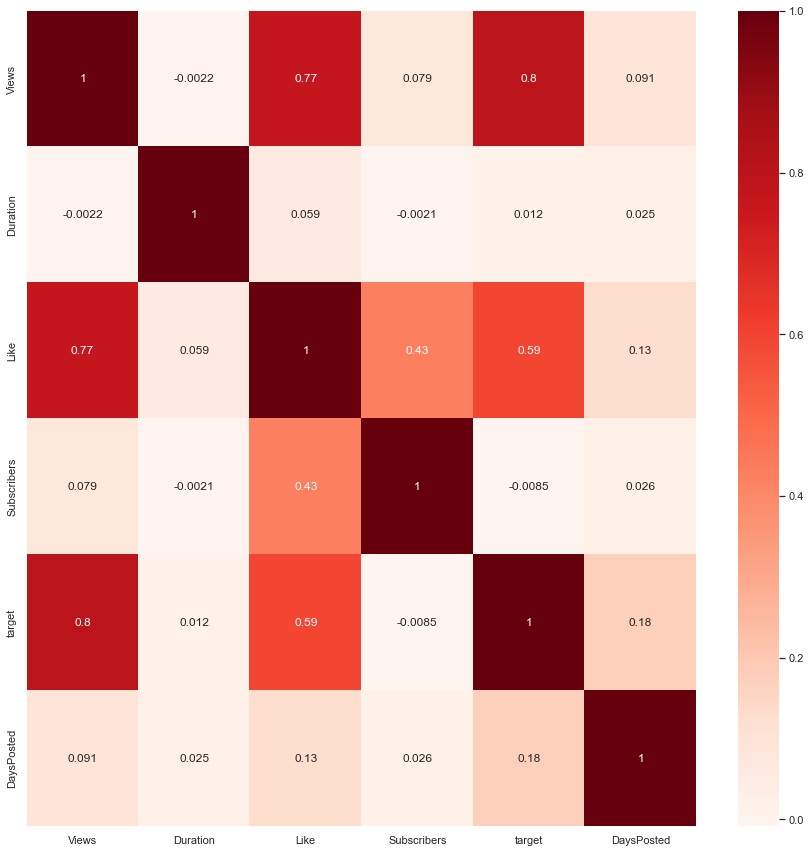

In [9]:
# See initial correlation between the various variables
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Reds')

## Identifying Best Approach in Normalising Target Variable

### Relationship between Views and Subsribers

Text(0, 0.5, 'Views')

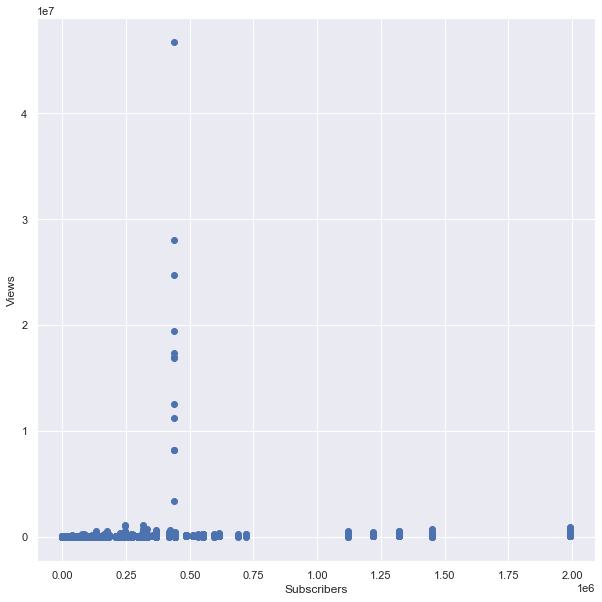

In [10]:
# Check relationship between Views and Subscribers
plt.figure(figsize=(10,10))
plt.scatter(x='Subscribers', y='Views', data=data)
plt.xlabel("Subscribers")
plt.ylabel('Views')

Strong outliers observed for views and subscribers, to be removed. 

In [11]:
def remove_outlier(df, column):
    """
    This function aims to remove the outliers within the dataset. 
    
    Parameters:
    ---------
    (1) df -- dataframe
    (2) column -- column name

    Returns:
    -------
    dataframe with outliers outside of the quantile range removed.
    """
    bot1=df[column].quantile(0.01)
    top1=df[column].quantile(0.99)
    df_final=df[~((df[column]<bot1) | (df[column]>top1))]
    return df_final

In [12]:
# Remove outliers from Views and Subscribers
data_remove = remove_outlier(data, 'Views')
data_remove = remove_outlier(data_remove, 'Subscribers')

Text(0, 0.5, 'Views')

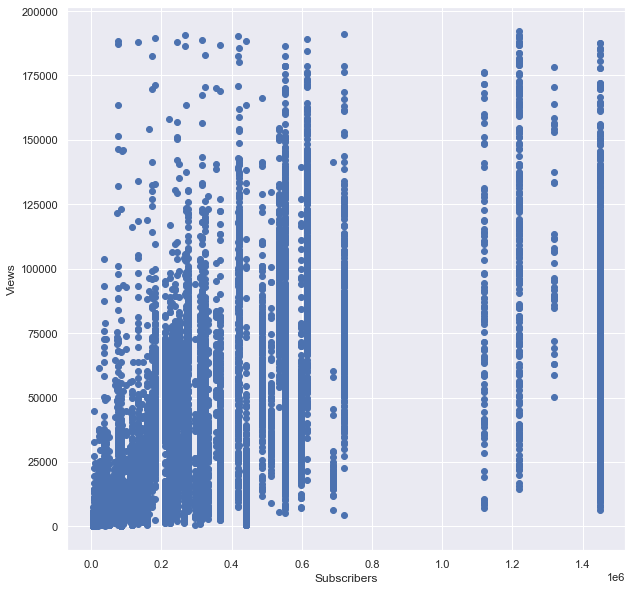

In [13]:
# Check relationship between Views and Subscribers
plt.figure(figsize=(10,10))
plt.scatter(x='Subscribers', y='Views', data=data_remove)
plt.xlabel("Subscribers")
plt.ylabel('Views')

Text(0.5, 1.0, 'After Removing Outliers')

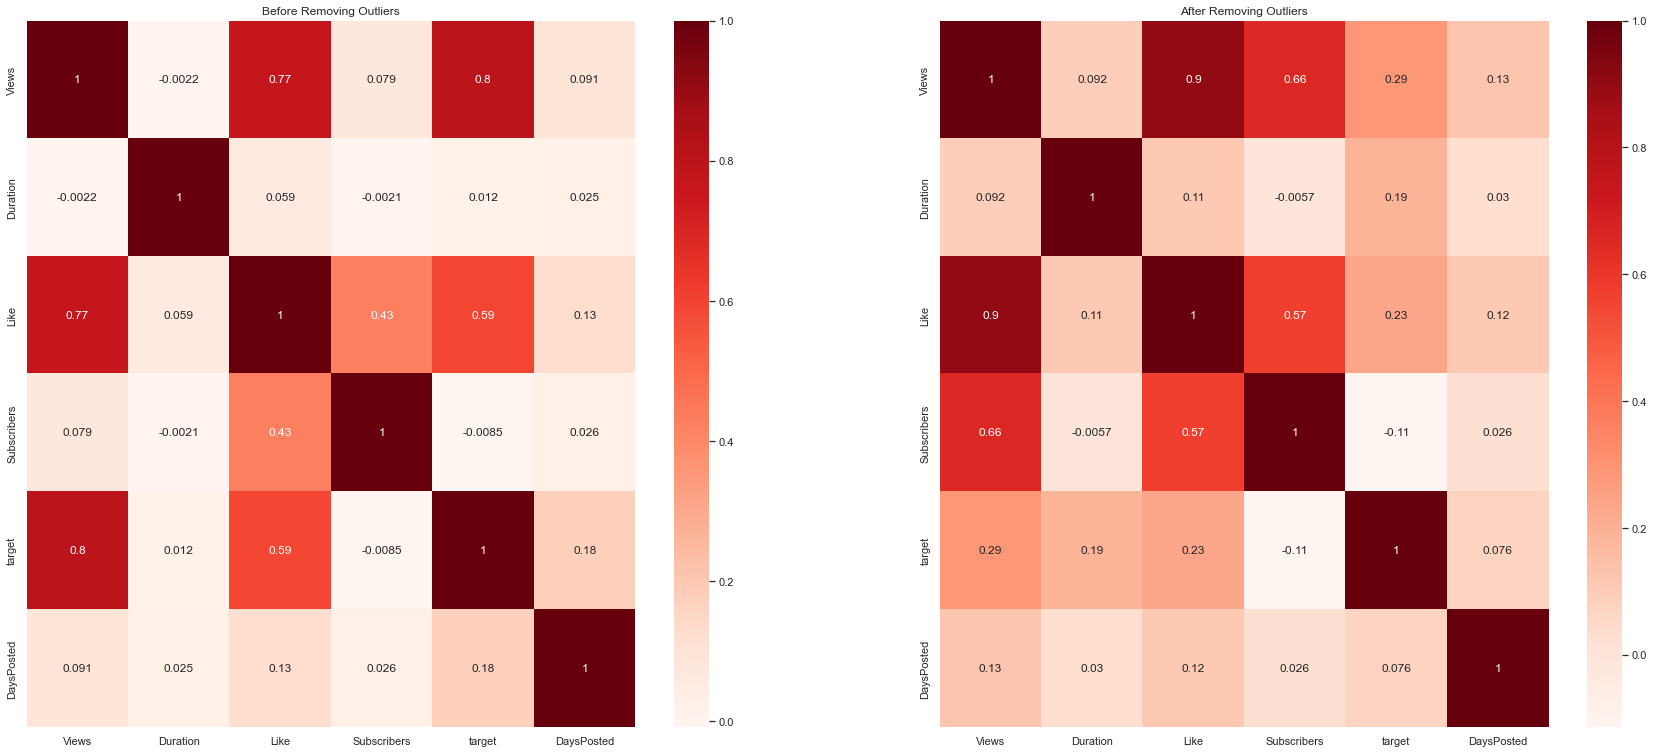

In [15]:
# See correlation between the various variables after removing outliers in views and subscribers
fig, axes = plt.subplots(1, 2, figsize=(30,13))

sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Reds', ax=axes[0])
axes[0].set_title('Before Removing Outliers')

sns.heatmap(data_remove.corr(), cbar=True, annot=True, cmap='Reds', ax=axes[1])
axes[1].set_title('After Removing Outliers')

We will normalise views with subscribers count. 

### Relationship between Days Posted and Views

Text(0, 0.5, 'Views')

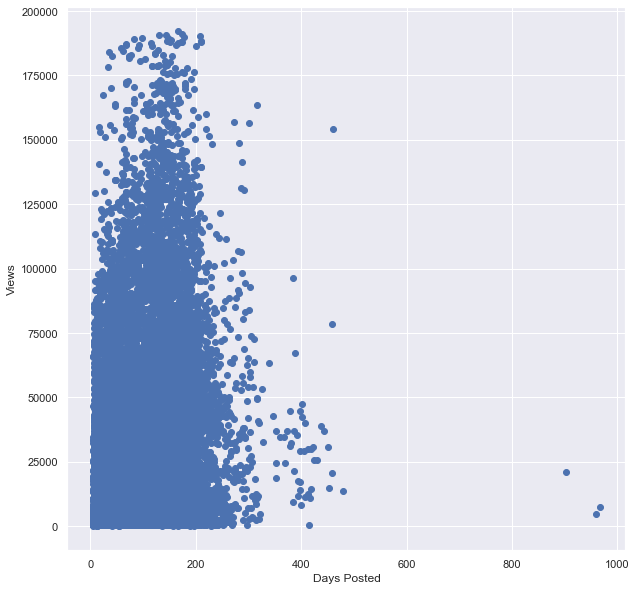

In [16]:
# See the plot between Views and DaysPosted
plt.figure(figsize=(10,10))
plt.scatter(x='DaysPosted', y='Views', data=data_remove)
plt.xlabel("Days Posted")
plt.ylabel('Views')

In [17]:
# Remove outliers in Views and DaysPosted
data_remove2= remove_outlier(data_remove, 'Views')
data_remove2 = remove_outlier(data_remove2, 'DaysPosted')

Text(0, 0.5, 'Views')

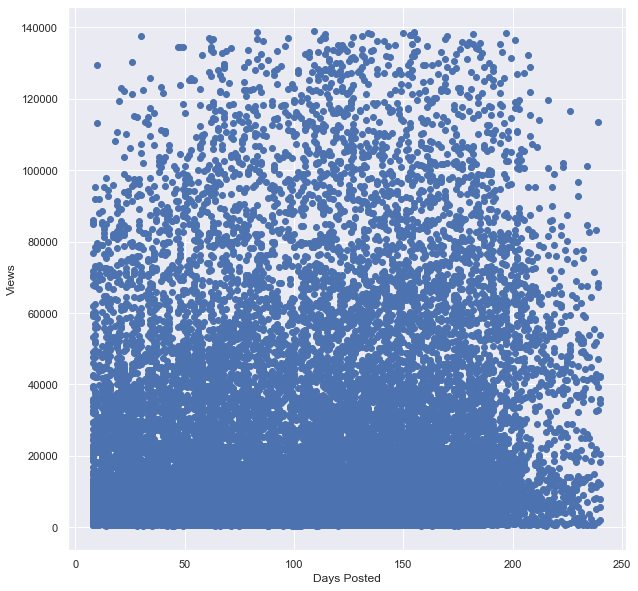

In [18]:
# Plot graph between Views and DaysPosted after outliers are removed
plt.figure(figsize=(10,10))
plt.scatter(x='DaysPosted', y='Views', data=data_remove2)
plt.xlabel("Days Posted")
plt.ylabel('Views')

In [19]:
# See correlation between Views and DaysPosted
data_remove2['DaysPosted'].corr(data_remove2['Views'])

0.10835849791406803

Since the correlation between DaysPosted and Views is relatively low 0.108, we will not include this variable in the normalisation of the target variable.